In [14]:
import sys
sys.path.append("../")
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from cellmating.mating import Mating
from cellmating.utils import file_traverse, dump_to_pkl
from cellmating.io import imread, imsave
from cellmating.mating import Mating
from script_wlli.for_check_result_utils import draw_subgraph

In [15]:
root = "/media/wd/T7/data/mating_all/20220903_YAV2104xYAV2105_003/tif/"
file_list = file_traverse(root, file_regular=r".*.tif")
print("totle images: ", len(file_list))

totle images:  20


In [23]:
file_name = file_list[5]
image = imread(file_name)[:, 0:200,0:200]
image = np.moveaxis(image, -1, 1)
file_name

'/media/wd/T7/data/mating_all/20220903_YAV2104xYAV2105_003/tif/YAV2104xYAV2105_005_06_rigid.tif'

In [24]:
image.shape

(241, 4, 200, 200)

In [72]:
from cellmating.visualize import animate_images
from IPython.display import HTML
from cellmating.visualize import label2rgb

In [73]:
# from cellmating.tracking._ioutrack import Tracker
from cellmating.tracking._iou_tracker import Tracker
# from cellmating.tracking._hausdorf_tracker import Tracker
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
%%time
trace = Tracker(image[:, -1,], threshold=0.6, max_miss=20, min_hist=3)
_ = trace()
traced_image = trace.to_image()

frame= 1 [11, 12] [11, 12]
frame= 2 [11, 12] [11, 12]
frame= 3 [11, 12] [11, 12]
frame= 4 [11, 12] [11, 12]
frame= 5 [11, 12] [11, 12]
frame= 6 [11, 12] [11, 12]
frame= 7 [11, 12] [11, 12]
frame= 8 [11, 12] [11, 12]
frame= 9 [11, 12] [11, 12]
frame= 10 [11, 12] [11, 12]
frame= 11 [11, 12] [11, 12]
frame= 12 [11, 12] [11, 12]
frame= 13 [0, 12] [10]
frame= 14 [0, 12] [10]
frame= 15 [11, 12] [11, 12]
frame= 16 [11, 12] [11, 12]
divison: [[0 0 1]]
frame= 17 [11, 12] [12, 13]
frame= 18 [11, 12] [11, 12]
frame= 19 [11, 12] [11, 12]
frame= 20 [11, 12] [12, 13]
frame= 21 [11] [11, 12]
frame= 22 [11] [11, 12]
frame= 23 [11] [11, 12]
frame= 24 [11] [12, 13]
frame= 25 [11] [12, 13]
frame= 26 [11] [12, 13]
frame= 27 [11] [12, 13]
divison: [[1 0 1]]
frame= 28 [0, 11] [12, 13]
frame= 29 [0, 11] [12, 13]
frame= 30 [0, 11] [12, 13]
frame= 31 [0, 11] [12, 13]
frame= 32 [0] [12]
frame= 33 [0] [12]
frame= 34 [0, 11] [12, 13]
frame= 35 [0, 11] [12, 13]
frame= 36 [11] [13, 14]
frame= 37 [0, 11] [12, 13]
fr

In [84]:
annotation = label2rgb(traced_image)

In [85]:
ani = animate_images(image[0:50,-1])
ani2 = animate_images(annotation[0:50])

html1 = HTML(ani.to_jshtml()).data
html2 = HTML(ani2.to_jshtml()).data

# Display the combined animations
HTML(f"""
<div style="display: flex;">
    <div style="flex: 1; margin-right: 10px;">
        {html1}
    </div>
    <div style="flex: 1; margin-left: 10px;">
        {html2}
    </div>
</div>
""")

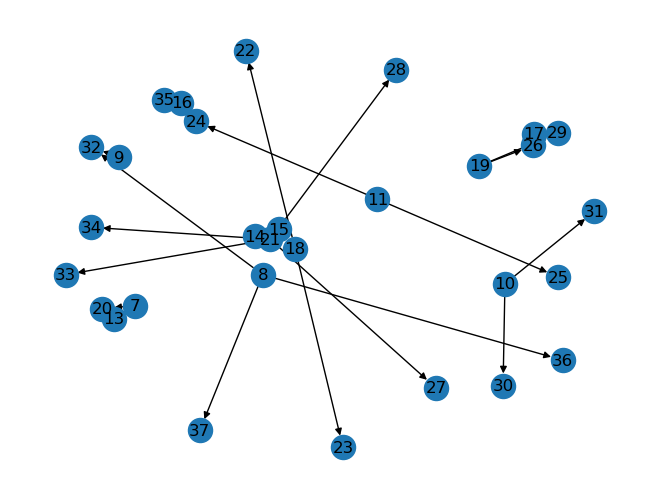

In [86]:
nx.draw(trace.network, with_labels=True)

In [44]:
a = [1,2,3,4,5,6,7]

In [45]:
for i in range(0, len(a)):
    if a[i] % 2 == 0:
        a.pop(i)

IndexError: list index out of range

In [21]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [22]:
key = int(file_name.split("_")[-1][:-4])
key = np.unique(tracked[-1,-1][tracked[-1,-2] == key])[0]%1000
c_mating = Mating(image=tracked, cells=trace.trackers, center=key, g=trace.network)

AttributeError: module 'networkx' has no attribute 'bfs_layout'

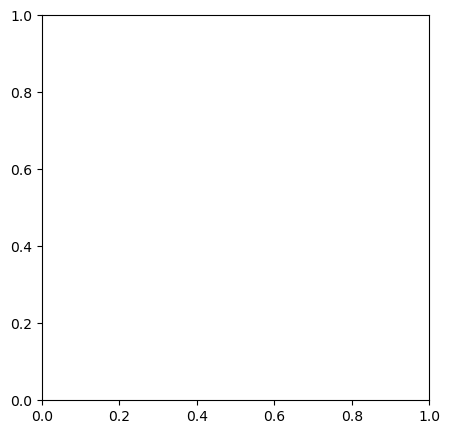

In [23]:
draw_subgraph(trace.network, key, c_mating.p, c_mating.m)
# plt.savefig("./figs_for_check_data/"+os.path.basename(file_name)[:-4]+"_net.png")

In [70]:
test.shape

(241, 200, 200, 3)

In [69]:
test = _label2rgb(traced_image)

In [68]:
import matplotlib as mpl
DEFAULT_IMSHOW_COLORS = mpl.colormaps['nipy_spectral']
def _label2rgb(img, colormap=None):
    """
    Convert a labeled image to an RGB image using a colormap.

    Parameters:
    -----------
    img : np.array
        Labeled image array.
    colormap : matplotlib.colors.ListedColormap, optional
        Colormap to use for mapping labels to colors. If None, a default colormap is used.

    Returns:
    --------
    data : np.array
        RGB image array with shape (height, width, 3) and dtype uint8.
    """
    try:
        mapped_labels_flat = np.unique(img)
        index = np.arange(0, len(mapped_labels_flat))
        if colormap is None:
            colormap = DEFAULT_IMSHOW_COLORS.resampled(len(index))

        label_index_map = {}
        f = 0
        for i in range(0, mapped_labels_flat.max()+1):
            if i == mapped_labels_flat[f]:
                label_index_map[i] = f
                f += 1
            else:
                label_index_map[i] = 0

        label_to_color = np.stack([colormap(label_index_map[i])[0:3] for i in np.arange(mapped_labels_flat.max()+1)])

        def __func(x):
            return label_to_color[x]

        data = (__func(img)*255).astype(np.uint8)
        return data
    except Exception as err:
        print(f"Unexpected error: {err}, {type(err)}")

In [22]:
imsave("./test_trace_image.tif", traced_image, imagej=True)

In [9]:
imsave("./test_seg_image.tif", image[:, -2,], imagej=True)

In [68]:
tracked = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]), 
                   dtype=image.dtype)
tracked[:, 0:image.shape[1]-1] = image[:, 0:image.shape[1]-1]
tracked[:, image.shape[1]-1] = traced_image

In [47]:
save_name = file_name
imsave(save_name, tracked, imagej=True)
dump_to_pkl(trace.network, save_name[:-4]+".network")
dump_to_pkl(trace.trackers, save_name[:-4]+".tracker")

In [48]:
tracked.shape

(241, 5, 250, 250)

In [34]:
data = np.array([[0,1,2,],[3,4,5],[6,7,8]])

In [78]:
data

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [86]:
5 in data[:, 0:2]

False

In [80]:
data.sum(1)

array([ 3, 12, 21])

In [19]:
import statistics

In [36]:
statistics.mode([1,2,2,2,3,3,3,4,5,6])

2

In [31]:
from scipy import stats

In [34]:
stats.mode(np.array([1,2,2,2,3,3,3,4,5,6]) % 1000, keepdims=False)

ModeResult(mode=3, count=3)

In [35]:
stats.mode(np.array([1,2,3,3,3,4,5,6]) % 1000)

/tmp/ipykernel_297213/2505128182.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(np.array([1,2,3,3,3,4,5,6]) % 1000)


ModeResult(mode=array([3]), count=array([3]))